In [58]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
train_data=pd.DataFrame(np.loadtxt('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/ada_train.data'))
valid_data=pd.DataFrame(np.loadtxt('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/ada_valid.data'))
test_data=pd.DataFrame(np.loadtxt('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/ada_test.data'))

train_labels=pd.DataFrame(np.loadtxt('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/ada_train.labels'))
valid_labels=pd.DataFrame(np.loadtxt('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/ada_valid.labels'))

# 1. Exploratory data analysis

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,133.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,189.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,109.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,113.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,120.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,562.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_data.shape

(4147, 48)

In [6]:
train_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [7]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
count,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.0,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.0,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.00000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000
mean,0.008922,0.028937,0.120569,126.408006,0.104895,0.028454,0.140825,0.860140,0.134314,20.033036,0.046057,0.020014,0.127562,0.0,631.886665,0.673499,0.065831,0.046057,0.742223,0.030383,0.0,0.121293,0.043164,0.090668,429.348686,0.028937,0.32409,0.071136,0.030625,0.140342,0.411382,10.964070,0.104172,0.049674,0.036171,0.038341,0.012780,0.009646,0.004823,411.804196,0.266458,0.106824,0.000482,0.463950,0.073065,0.140825,0.000241,0.029901
std,0.094046,0.167649,0.325665,69.754074,0.306455,0.166287,0.347883,0.346884,0.341030,91.933304,0.209635,0.140066,0.333642,0.0,161.410107,0.468990,0.248016,0.209635,0.437463,0.171661,0.0,0.326506,0.203250,0.287171,146.029831,0.167649,0.46809,0.257082,0.172319,0.347384,0.492143,76.318757,0.305520,0.217298,0.186737,0.192041,0.112339,0.097749,0.069287,119.999993,0.442160,0.308927,0.021958,0.498759,0.260274,0.347883,0.015529,0.170335
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,189.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,78.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,562.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,311.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,624.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,411.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,812.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,522.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,454.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,648.000000,1.000000,1.000000,1.000000,0.0,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,999.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train_data.nunique()

0       2
1       2
2       2
3     330
4       2
5       2
6       2
7       2
8       2
9      48
10      2
11      2
12      2
13      1
14     16
15      2
16      2
17      2
18      2
19      2
20      1
21      2
22      2
23      2
24     69
25      2
26      2
27      2
28      2
29      2
30      2
31     51
32      2
33      2
34      2
35      2
36      2
37      2
38      2
39     75
40      2
41      2
42      2
43      2
44      2
45      2
46      2
47      2
dtype: int64

Most features are binary.

In [9]:
non_binary_cols_idx = train_data.columns[train_data.nunique()>2].values
non_binary_cols_idx

array([ 3,  9, 14, 24, 31, 39])

In [10]:
one_val_col = train_data.columns[train_data.nunique()==1].values
one_val_col

array([13, 20])

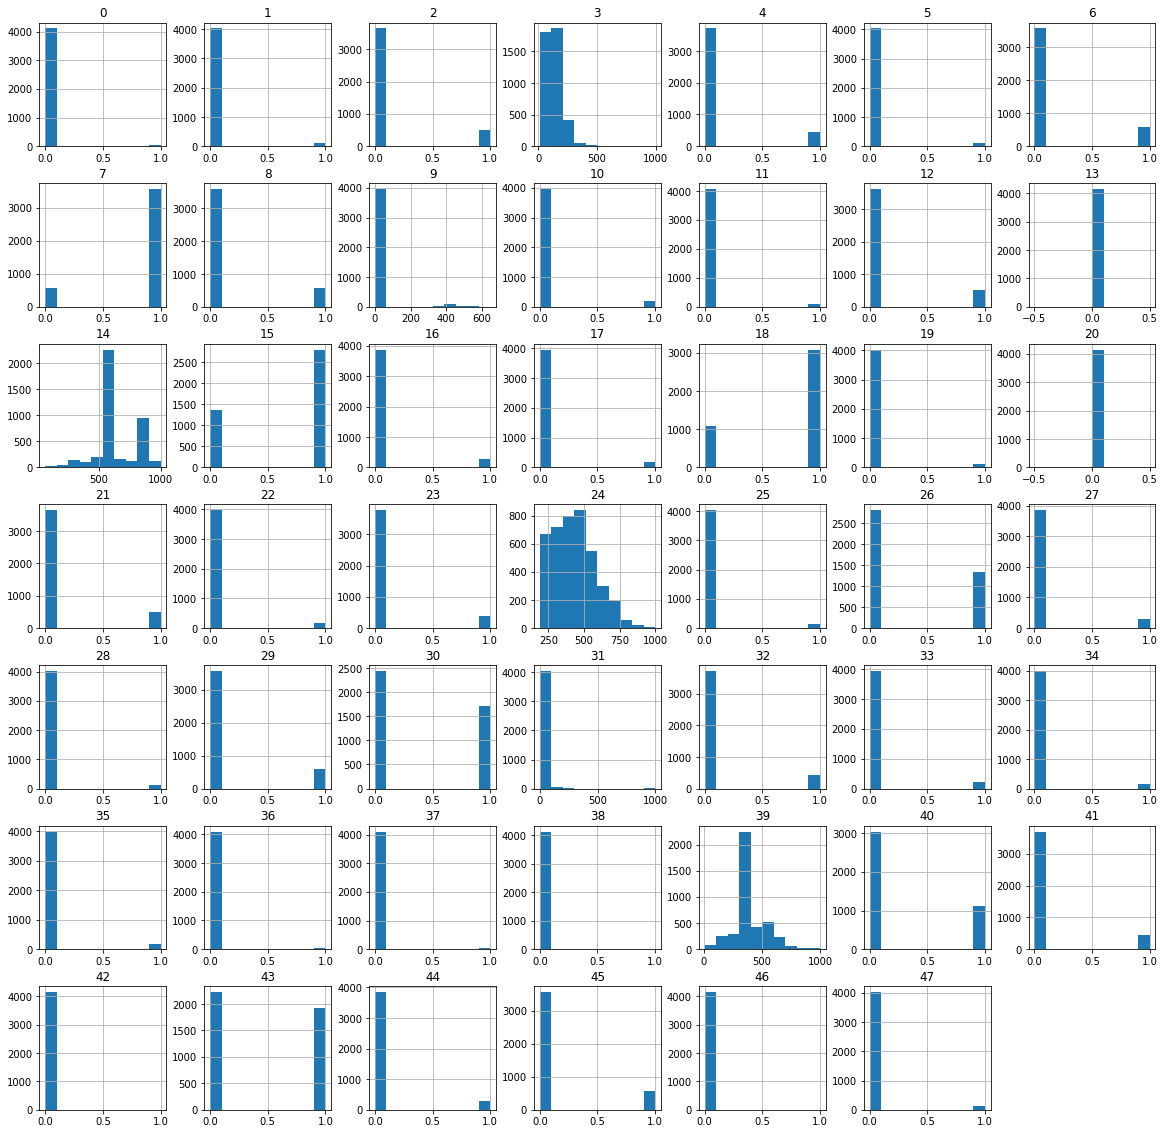

In [11]:
train_data.hist(figsize=(20,20));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f015c9b01d0>,
      dtype=object)

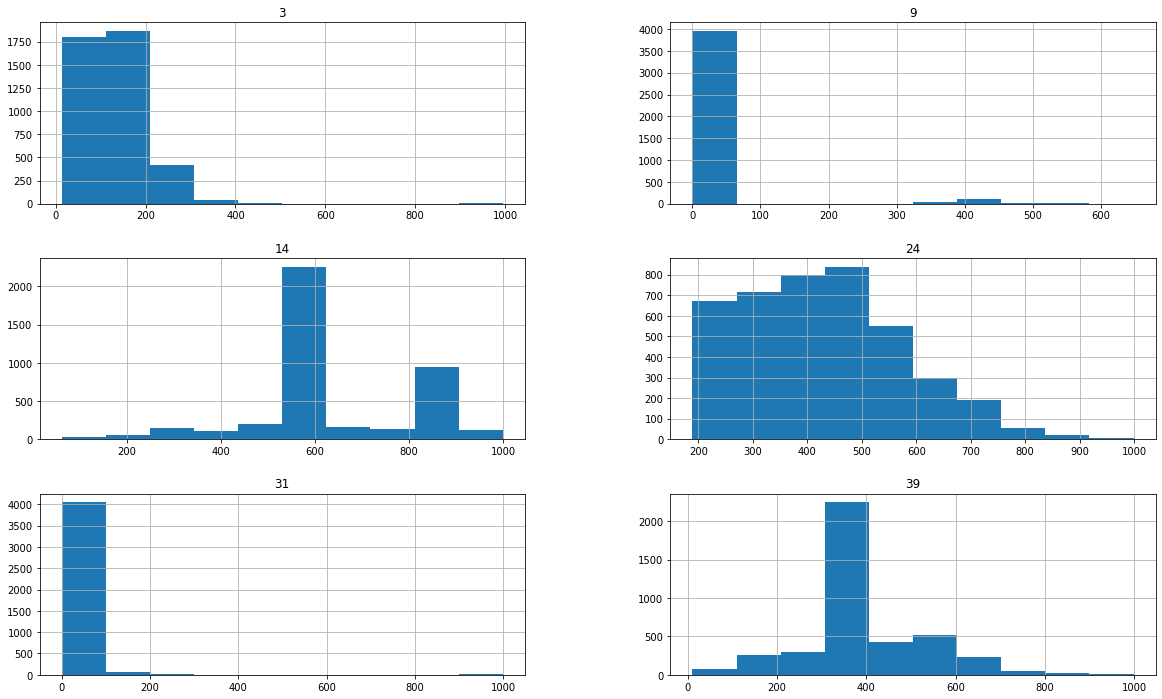

In [12]:
max_values = train_data.max().tolist()
large_val_cols = pd.DataFrame()
for i in range(len(train_data.columns)):
    if(max_values[i]>1):
        a=train_data[[i]]
        large_val_cols=pd.concat([large_val_cols,a],axis=1)
large_val_cols.hist(figsize=(20,12))

Text(0.5, 1.03, 'Values of features with more than 2 values')

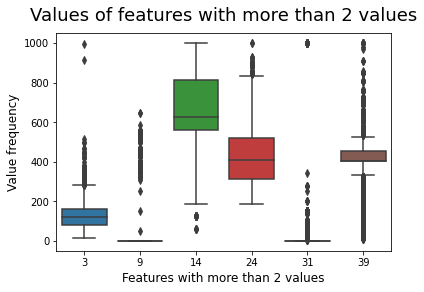

In [13]:
sns.boxplot(data=large_val_cols)
plt.ylabel('Value frequency', fontsize = 12)
plt.xlabel('Features with more than 2 values', fontsize = 12)
plt.title('Values of features with more than 2 values', fontsize = 18, y = 1.03)

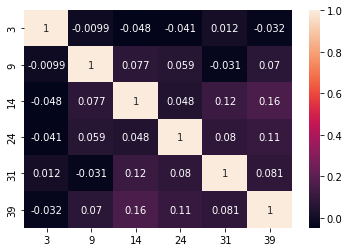

In [14]:
sns.heatmap(train_data[[3, 9, 14, 24, 31, 39]].corr(), annot=True)

#2. Data engineering

In [15]:
#Dropping the 2 columns containing only 0
train_data=train_data.drop(13, axis=1)
train_data=train_data.drop(20, axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler

train_data_scaled = train_data.copy()
std_cols = [3, 14, 24, 39]
features = train_data_scaled[std_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
train_data_scaled[std_cols] = features
train_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,1.0,1.0,-1.353604,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.116009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.885876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.094515,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.207546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.646086,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.415206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.249593,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.116009,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.175679,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-0.192241,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.116009,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.201002,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065043,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,-0.091877,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.433028,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.344741,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.906811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#we repeat the process for validation set

In [18]:
valid_data=valid_data.drop(13, axis=1)
valid_data=valid_data.drop(20, axis=1)

In [19]:
valid_data_scaled = valid_data.copy()
features = valid_data_scaled[std_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
valid_data_scaled[std_cols] = features
valid_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,-0.735191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.464109,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.163463,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.754331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,-1.533894,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.464109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.902512,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.814284,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.192676,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.630229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.665889,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.754331,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.404729,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.558446,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.214786,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029976,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,-0.614632,0.0,0.0,1.0,1.0,0.0,365.0,0.0,0.0,0.0,-0.047926,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.002490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def confidence_interval(avg_metric, n, z_a2 = 1.96):
    b1 = 2*n*avg_metric + (z_a2)**2
    b2 = (z_a2*((z_a2)**2+4*n*avg_metric -4*n*(avg_metric)**2)**(1/2))
    b3 = (2*(n+(z_a2)**2))
    return (round((b1 - b2)/b3,3), round((b1 + b2)/b3,3))

In [21]:
def calculate_BER(y_real, y_predicted):
    tn, fp, fn, tp = metrics.confusion_matrix(y_real, y_predicted).ravel()
    BER = 0.5*(fp*1.0/(fp + tn) + fn*1.0/(tp + fn))
    return round(BER,3)

In [22]:
def difference_confidence_interval(avg_metric_1, n_1, avg_metric_2, n_2, z_a2 = 1.96):
    sd = ((avg_metric_1*(1-avg_metric_1))/n_1 + (avg_metric_2*(1-avg_metric_2))/n_2)**(1/2)
    diff = abs(avg_metric_1 - avg_metric_2)
    return (round(diff - z_a2*sd,3), round(diff + z_a2*sd,3))

# 3. Models

## 3.1. kNN

In [23]:
X = train_data_scaled
y = train_labels[0]

In [24]:
#metric = make_scorer(balanced_accuracy_score)

In [25]:
#Finding the best k
score = []
neighbours = []

for k in range(1,25):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    cv_results = cross_validate(knn_model, X,y, scoring = 'accuracy', cv=50)
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

Text(0, 0.5, 'Accuracy')

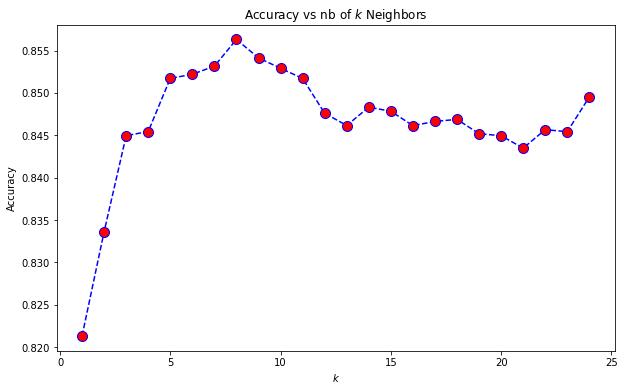

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs nb of $k$ Neighbors')
plt.xlabel('$k$')
plt.ylabel('Accuracy')

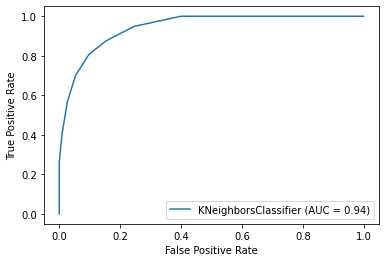

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 8).fit(X,y)
metrics.plot_roc_curve(knn_model, X, y)
plt.show()

In [28]:
y_pred=knn_model.predict(valid_data_scaled.values)
fpr, tpr, thresholds = metrics.roc_curve(valid_labels.values, y_pred)
metrics.auc(fpr, tpr)

0.7658078167786905

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_labels.values, y_pred)

0.8385542168674699

In [30]:
calculate_BER(valid_labels.values, y_pred)

0.234

Predicted mean Accuracy for KNN:  0.8562680290550168
Interval alpha = 0.05 of Accuracy for KNN:  (0.788, 0.905)
Observed Accuracy for KNN (in validation):  0.8385542168674699
Observed BER for KNN (in validation):  0.234


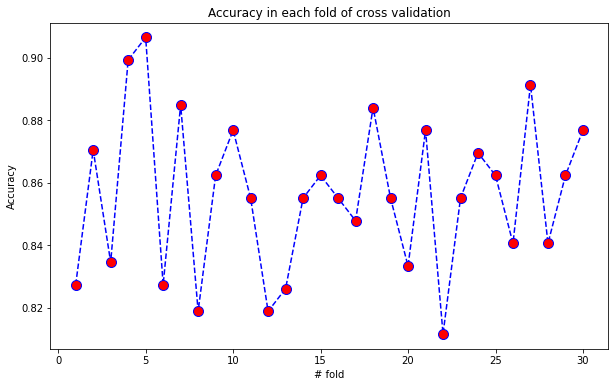

In [31]:
folds = 30
X = train_data_scaled
y = train_labels[0]

X_val = valid_data_scaled.values
y_val = valid_labels.values

knn_model = KNeighborsClassifier(n_neighbors = 8).fit(X,y)

cv_results = cross_validate(knn_model, X, y, cv = folds, scoring = 'accuracy')
predicted_AUC = cv_results["test_score"].mean()
n_in_val_of_cv = X.shape[0]/folds

y_pred = knn_model.predict(X_val)

#print("AUC for 30 folds of CV: ", cv_results["test_score"])
print("Predicted mean Accuracy for KNN: ", predicted_AUC)
print("Interval alpha = 0.05 of Accuracy for KNN: ", confidence_interval(predicted_AUC, n_in_val_of_cv))
print("Observed Accuracy for KNN (in validation): ", metrics.accuracy_score(y_val, y_pred))
print("Observed BER for KNN (in validation): ", calculate_BER(y_val, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,31),cv_results["test_score"],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy in each fold of cross validation')
plt.xlabel('# fold')
plt.ylabel('Accuracy');

## 3.2 LDA

Predicted mean Accuracy for LDA:  0.8439613526570048
Interval alpha = 0.05 of Accuracy for LDA:  (0.774, 0.895)
Observed Accuracy for LDA (in validation):  0.8457831325301205
Observed BER for LDA (in validation):  0.223


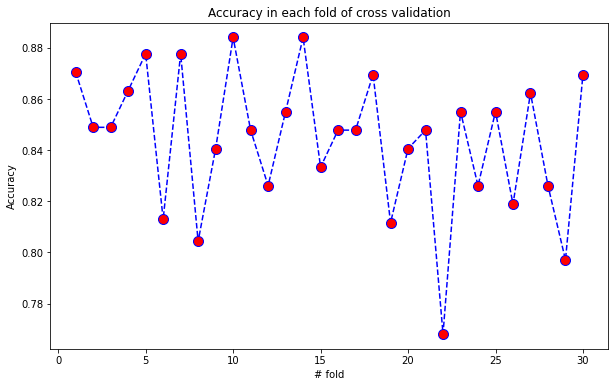

In [32]:
folds = 30
X = train_data_scaled
y = train_labels[0]

X_val = valid_data_scaled.values
y_val = valid_labels.values

lda_model = LDA()
lda_model.fit(X, y)

cv_results = cross_validate(lda_model, X, y, cv = folds, scoring = 'accuracy')
predicted_AUC = cv_results["test_score"].mean()
n_in_val_of_cv = X.shape[0]/folds

y_pred = lda_model.predict(X_val)

#print("AUC for 30 folds of CV: ", cv_results["test_score"])
print("Predicted mean Accuracy for LDA: ", predicted_AUC)
print("Interval alpha = 0.05 of Accuracy for LDA: ", confidence_interval(predicted_AUC, n_in_val_of_cv))
print("Observed Accuracy for LDA (in validation): ", metrics.accuracy_score(y_val, y_pred))
print("Observed BER for LDA (in validation): ", calculate_BER(y_val, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,31),cv_results["test_score"],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy in each fold of cross validation')
plt.xlabel('# fold')
plt.ylabel('Accuracy');

## 3.3. Decision tree classifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(train_data_scaled, train_labels, test_size=0.3)
dtree = DecisionTreeClassifier()

print(dtree.fit(X_train, y_train))

train_accuracy = dtree.score(X_train, y_train)

predictions = dtree.predict(X_test)
print('Training accuracy:', train_accuracy)

print('\nTesting')
print('Confusion matrix:\n', confusion_matrix(y_test,predictions))
print('\n')
report = classification_report(y_test,predictions)
print(classification_report(y_test,predictions))



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy: 1.0

Testing
Confusion matrix:
 [[813 115]
 [117 200]]


              precision    recall  f1-score   support

        -1.0       0.87      0.88      0.88       928
         1.0       0.63      0.63      0.63       317

    accuracy                           0.81      1245
   macro avg       0.75      0.75      0.75      1245
weighted avg       0.81      0.81      0.81      1245



Predicted mean Accuracy for Dtree:  0.8037135508984118
Interval alpha = 0.05 of Accuracy for Dtree:  (0.73, 0.861)
Observed Accuracy for Dtree (in validation):  0.7951807228915663
Observed BER for Dtree (in validation):  0.279


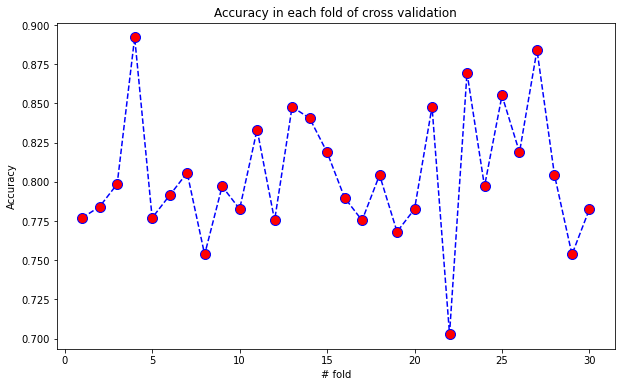

In [34]:
folds = 30
X = train_data_scaled
y = train_labels[0]

X_val = valid_data_scaled.values
y_val = valid_labels.values

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

cv_results = cross_validate(dtree, X, y, cv = folds, scoring = 'accuracy')
predicted_AUC = cv_results["test_score"].mean()
n_in_val_of_cv = X.shape[0]/folds

y_pred = dtree.predict(X_val)

#print("AUC for 30 folds of CV: ", cv_results["test_score"])
print("Predicted mean Accuracy for Dtree: ", predicted_AUC)
print("Interval alpha = 0.05 of Accuracy for Dtree: ", confidence_interval(predicted_AUC, n_in_val_of_cv))
print("Observed Accuracy for Dtree (in validation): ", metrics.accuracy_score(y_val, y_pred))
print("Observed BER for Dtree (in validation): ", calculate_BER(y_val, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,31),cv_results["test_score"],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy in each fold of cross validation')
plt.xlabel('# fold')
plt.ylabel('Accuracy');

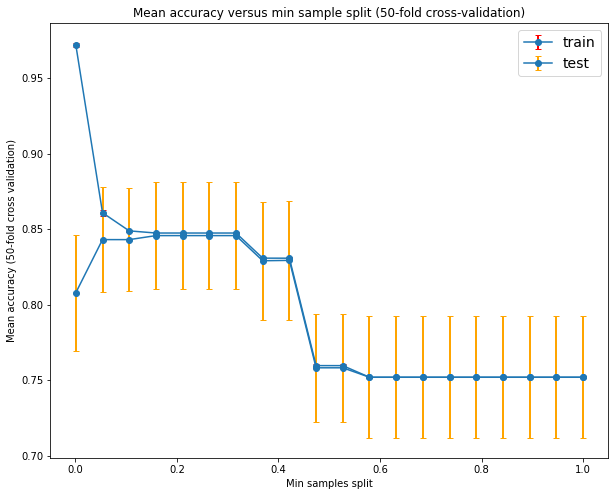

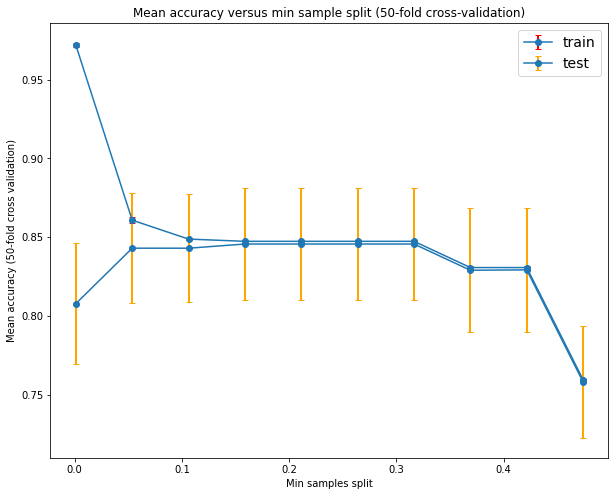

In [35]:
from sklearn.model_selection import KFold
folds = 50
min_samples_splits = np.linspace(0.001, 1, 20, endpoint=True)

accuracy = np.zeros((2, folds, min_samples_splits.shape[0]), dtype=float)
depths = [0]*min_samples_splits.shape[0]

i=0
for min_samples_split in min_samples_splits:
  kfoldtree = DecisionTreeClassifier(min_samples_split=min_samples_split)
  cv = KFold(folds, random_state=1, shuffle=True)
  cv_results = cross_validate(kfoldtree, X, y, scoring='accuracy', cv=cv, return_train_score=True)

  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']

  kfoldtree.fit(X,y)
  depths[i] = kfoldtree.get_depth()
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)

fig = plt.figure(figsize=(10,8))

plt.errorbar(min_samples_splits, accuracy_mean[0,:], accuracy_std[0,:], fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'train')
plt.errorbar(min_samples_splits, accuracy_mean[1,:], accuracy_std[1,:], fmt='-o', ecolor = 'orange', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'test')
#plt.plot(min_samples_splits, accuracy_mean[0,:], '-', label='train')
#plt.plot(min_samples_splits, accuracy_mean[1,:], '-',  label='test')

plt.legend(fontsize=14)
plt.xlabel('Min samples split')
plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)')
plt.title(f'Mean accuracy versus min sample split ({folds}-fold cross-validation)')
plt.show()

#We remove the last part of previous graph
fig = plt.figure(figsize=(10,8))

plt.errorbar(min_samples_splits[:10], accuracy_mean[0,:10], accuracy_std[0,:10], fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'train')
plt.errorbar(min_samples_splits[:10], accuracy_mean[1,:10], accuracy_std[1,:10], fmt='-o', ecolor = 'orange', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'test')

plt.legend(fontsize=14)
plt.xlabel('Min samples split')
plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)')
plt.title(f'Mean accuracy versus min sample split ({folds}-fold cross-validation)')
plt.show()

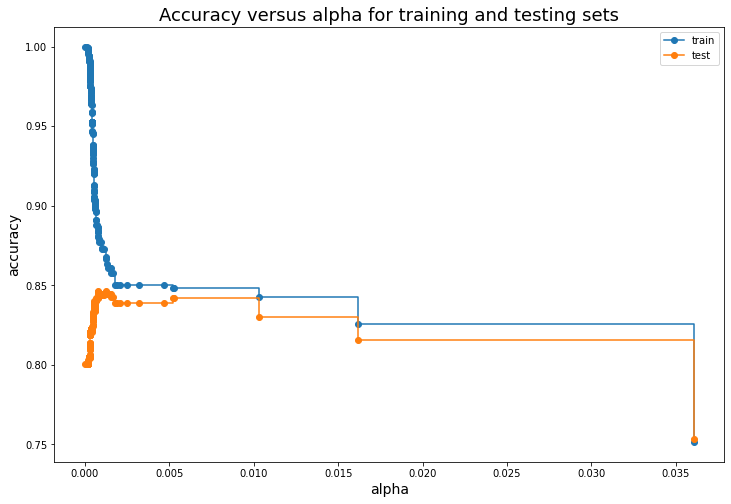

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#get alpha values (ccp_alphas)
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#build trees for each alpha values
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

#get rid of the tree with one node only
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#The effect of alpha on accuracy in train and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig = plt.figure(figsize=(12,8))
plt.xlabel("alpha", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.title("Accuracy versus alpha for training and testing sets", fontsize=18)
plt.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

In [37]:
ccp_alphas[ccp_alphas>0.002]

array([0.00206641, 0.0024732 , 0.00317532, 0.00467669, 0.00520914,
       0.00528765, 0.01030644, 0.01618833, 0.03604973])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier(ccp_alpha = 0.00223884)

print(dtree.fit(X_train, y_train))

train_accuracy = dtree.score(X_train, y_train)

predictions = dtree.predict(X_test)
print('Training accuracy:', train_accuracy)

print('\nTesting')
print('Confusion matrix:\n', confusion_matrix(y_test,predictions))
print('\n')
report = classification_report(y_test,predictions)
print(classification_report(y_test,predictions))

DecisionTreeClassifier(ccp_alpha=0.00223884, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
Training accuracy: 0.8494141971054445

Testing
Confusion matrix:
 [[875  72]
 [117 181]]


              precision    recall  f1-score   support

        -1.0       0.88      0.92      0.90       947
         1.0       0.72      0.61      0.66       298

    accuracy                           0.85      1245
   macro avg       0.80      0.77      0.78      1245
weighted avg       0.84      0.85      0.84      1245



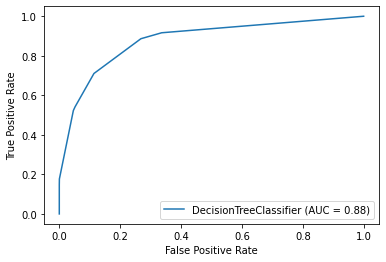

In [39]:
dtree_model = dtree.fit(X,y)
metrics.plot_roc_curve(dtree_model, X, y)
plt.show()

In [40]:
y_pred_d=dtree_model.predict(valid_data_scaled.values)
accuracy_score(valid_labels.values, y_pred_d)

0.8602409638554217

## 3.4 Logistic Classifier

In [47]:
x_train, x_val, y_train, y_val = train_test_split(X, y)

In [48]:
reg_model = LogisticRegression(max_iter=4000)
reg_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
reg_model.score(x_train, y_train)

0.852411575562701

In [50]:
reg_model.score(x_val, y_val)

0.8553519768563163

In [53]:
reg_model = LogisticRegression(max_iter=4000)
scores = cross_val_score(reg_model, x_train, y_train, cv=5)

In [54]:
print(np.mean(scores))
print(np.std(scores))

0.8491961414790996
0.017914325758436166


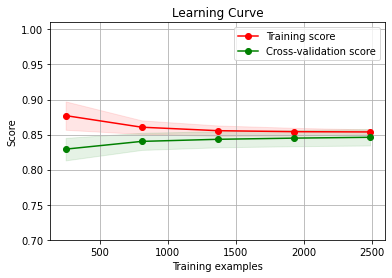

In [59]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, "Learning Curve", x_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [60]:
reg_model = LogisticRegression(max_iter=4000)
reg_model.fit(x_train, y_train)
y_val_pred = reg_model.predict(x_val)

y_val_pred = (y_val_pred+1)/2
y_val_pred = y_val_pred.astype(int)

y_val = (y_val+1)/2
y_val = y_val.astype(int)

cm = confusion_matrix(y_val, y_val_pred)
cm

array([[715,  53],
       [ 97, 172]])

In [61]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

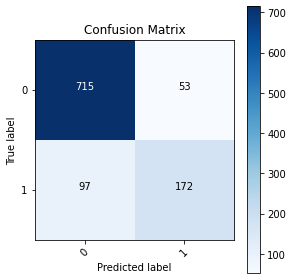

In [62]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

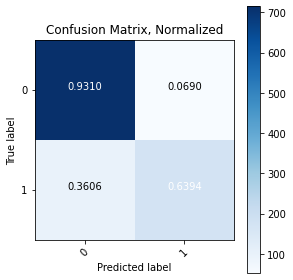

In [63]:
plot_confusion_matrix(cm, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix, Normalized")

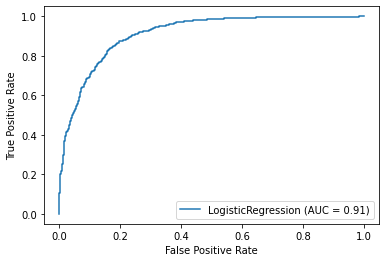

In [64]:
from sklearn import metrics

reg_model = LogisticRegression(max_iter=4000)
reg_model_ = reg_model.fit(x_train,y_train)
metrics.plot_roc_curve(reg_model_, x_train, y_train)
plt.show()

In [65]:
calculate_BER(y_val, y_val_pred)

0.215

Predicted mean Accuracy for Regression:  0.847111875716818
Interval alpha = 0.05 of Accuracy for Regression:  (0.778, 0.898)
Observed Accuracy for Regression (in validation):  0.8481927710843373
Observed BER for Regression (in validation):  0.225


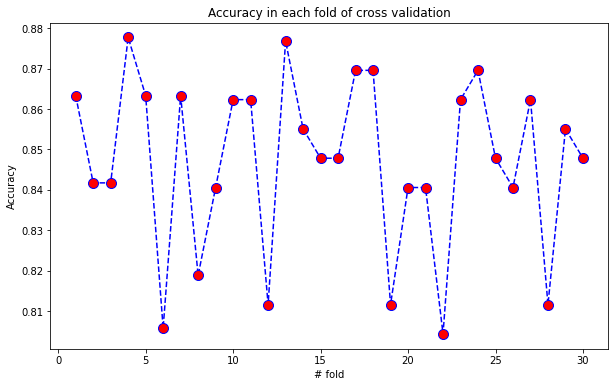

In [66]:
folds = 30
X_train = train_data_scaled
y_train = train_labels[0]

X_val = valid_data_scaled.values
y_val = valid_labels.values

dtree = LogisticRegression(max_iter=4000)
dtree.fit(X_train, y_train)

cv_results = cross_validate(dtree, X, y, cv = folds, scoring = 'accuracy')
predicted_AUC = cv_results["test_score"].mean()
n_in_val_of_cv = X.shape[0]/folds

y_pred = dtree.predict(X_val)

#print("AUC for 30 folds of CV: ", cv_results["test_score"])
print("Predicted mean Accuracy for Regression: ", predicted_AUC)
print("Interval alpha = 0.05 of Accuracy for Regression: ", confidence_interval(predicted_AUC, n_in_val_of_cv))
print("Observed Accuracy for Regression (in validation): ", metrics.accuracy_score(y_val, y_pred))
print("Observed BER for Regression (in validation): ", calculate_BER(y_val, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,31),cv_results["test_score"],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy in each fold of cross validation')
plt.xlabel('# fold')
plt.ylabel('Accuracy');

## 3.4 Naive Bayes

In [91]:
X = train_data_scaled
y = train_labels[0]
x_train, x_val, y_train, y_val = train_test_split(X, y)

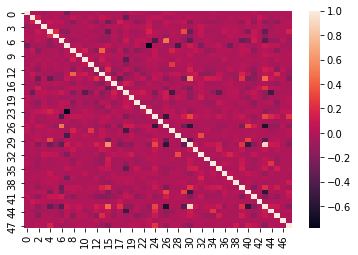

In [92]:
sns.heatmap(x_train.corr(),annot=False)

In [93]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
scores = cross_val_score(classifier, x_train, y_train, cv=5)
print("Mean accuracy",round(np.mean(scores),4))
print("Std accuracy",round(np.std(scores),4))

Mean accuracy 0.7669
Std accuracy 0.007


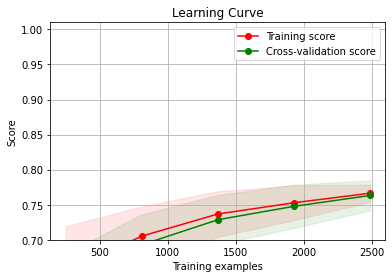

In [94]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, "Learning Curve", x_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

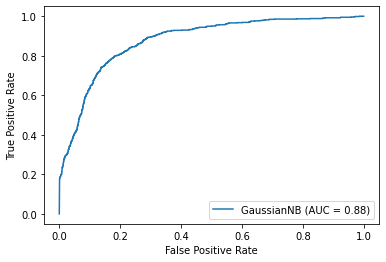

In [96]:
from sklearn import metrics

bayes_model = GaussianNB()
bayes_model = bayes_model.fit(x_train,y_train)
metrics.plot_roc_curve(bayes_model, x_train, y_train)
plt.show()

In [97]:
y_val_pred = bayes_model.predict(x_val)

y_val_pred = (y_val_pred+1)/2
y_val_pred = y_val_pred.astype(int)

y_val = (y_val+1)/2
y_val = y_val.astype(int)

cm = confusion_matrix(y_val, y_val_pred)
cm

array([[604, 175],
       [ 38, 220]])

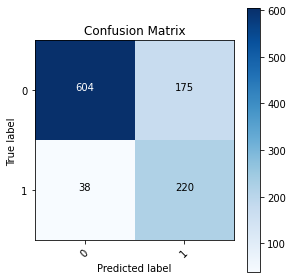

In [98]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

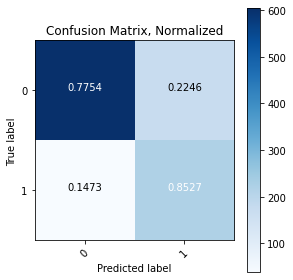

In [99]:
plot_confusion_matrix(cm, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix, Normalized")

In [100]:
calculate_BER(y_val, y_val_pred)

0.186

Predicted mean Accuracy for Bayesian:  0.7726027873353493
Interval alpha = 0.05 of Accuracy for Bayesian:  (0.696, 0.835)
Observed Accuracy for Bayesian (in validation):  0.7590361445783133
Observed BER for Bayesian (in validation):  0.203


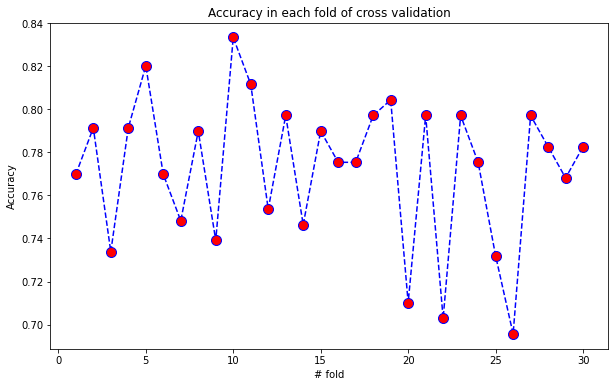

In [101]:

folds = 30
X_train = train_data_scaled
y_train = train_labels[0]

X_val = valid_data_scaled.values
y_val = valid_labels.values

dtree = GaussianNB()
dtree.fit(X_train, y_train)

cv_results = cross_validate(dtree, X, y, cv = folds, scoring = 'accuracy')
predicted_AUC = cv_results["test_score"].mean()
n_in_val_of_cv = X.shape[0]/folds

y_pred = dtree.predict(X_val)

#print("AUC for 30 folds of CV: ", cv_results["test_score"])
print("Predicted mean Accuracy for Bayesian: ", predicted_AUC)
print("Interval alpha = 0.05 of Accuracy for Bayesian: ", confidence_interval(predicted_AUC, n_in_val_of_cv))
print("Observed Accuracy for Bayesian (in validation): ", metrics.accuracy_score(y_val, y_pred))
print("Observed BER for Bayesian (in validation): ", calculate_BER(y_val, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,31),cv_results["test_score"],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy in each fold of cross validation')
plt.xlabel('# fold')
plt.ylabel('Accuracy');